In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
#need to mix up patients 
X_data = pd.read_csv ('Data_RISE.csv',engine='python') 
Y = pd.read_csv ('RISE_PCA_data.csv',engine='python')
Y_data = Y[['Trauma Group']].copy()
del Y['Trauma Group']
X_data.columns = Y.columns

X_data

,Age,Sex,Exercise pre,Number of TBI,Years post TBI,LOC,LOC duration,PTA,ISI pre,SHI pre,...,CV_IL6_base,Final_Conc_IL6_fu,CV_IL6_Fu,Final_Conc_IL10_base,CV_IL10_base,Final_Conc_IL10_fu,CV_IL10_fu,Final_Conc_TNFa_base,CV_TNFa_Base,Final_Conc_TNFa_fu
0,42.0,0.0,3.0,1.0,19.0,1.0,60.00,0.0,16.0,6.0,...,0.06280,1.575,0.02760,0.380,0.03740,0.360,0.00850,2.315,0.03040,2.340
1,70.0,0.0,4.0,1.0,20.0,0.0,2.75,0.0,10.0,17.0,...,0.01230,2.500,0.00280,0.510,0.03100,0.610,0.02000,3.450,0.05610,3.540
2,70.0,0.0,3.0,1.0,51.0,1.0,0.50,0.0,4.0,12.0,...,0.06260,0.970,0.05510,0.710,0.02270,0.680,0.01510,3.150,0.06400,3.030
3,72.0,0.0,2.0,1.0,15.0,0.0,32.50,0.0,8.0,12.0,...,0.06570,2.020,0.00930,0.480,0.04110,0.440,0.00120,2.670,0.04460,2.590
4,82.0,0.0,4.0,5.0,49.0,0.0,5.00,0.0,11.0,7.0,...,0.07000,3.040,0.05570,0.630,0.04510,0.640,0.02850,5.350,0.05800,5.140
5,69.0,0.0,4.0,2.0,48.0,1.0,120.00,0.0,16.0,22.0,...,0.01210,1.810,0.00910,0.590,0.05980,0.510,0.02120,2.930,0.01520,3.560
6,71.0,0.0,3.0,4.0,53.0,1.0,10.00,0.0,18.0,11.0,...,0.01120,1.630,0.03120,0.610,0.03370,0.550,0.00250,3.730,0.02180,2.990
7,44.0,0.0,3.0,2.0,9.0,0.0,31.00,0.0,7.0,17.0,...,0.01330,2.120,0.01240,0.600,0.03900,0.700,0.01950,2.290,0.01210,2.340
8,40.0,0.0,4.0,1.0,28.0,0.0,3630.00,0.0,6.0,15.0,...,0.05990,1.130,0.04590,0.280,0.03370,0.280,0.01580,1.960,0.01620,2.090
9,69.0,0.0,3.0,1.0,18.0,1.0,5.00,0.0,11.0,21.0,...,0.03900,2.260,0.00605,0.495,0.03605,0.525,0.01060,3.060,0.05035,3.065


In [135]:
Y_data = Y_data.iloc[1: , :]
#Y_data

## Use Random Forest for variable selection

In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.33, random_state=42)

In [138]:
feature_names = [f"feature {i}" for i in range(X_data.shape[1])]
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

forest.score(X_test, y_test)

/Users/emmamaliar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Mean Absolute Error: 0.19363636363636366
Mean Squared Error: 0.09399090909090907
Root Mean Squared Error: 0.306579368338623


0.6209033333333334

In [139]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

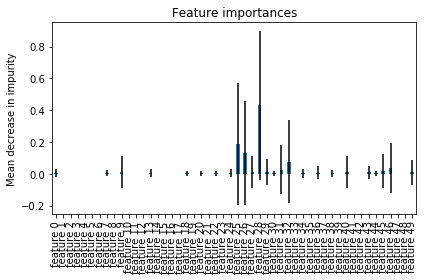

In [140]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [141]:
X_data.columns

Index(['Age', 'Sex', 'Exercise pre', 'Number of TBI', 'Years post TBI', 'LOC',
       'LOC duration', 'PTA', 'ISI pre', 'SHI pre', 'pre Bedtime (24)',
       'pre Bedtime Variance (SD)', 'pre Waketime (24)',
       'pre Waketime Variance (SD)', 'preMidsleep (24)', 'pre Time in bed',
       'pre TIB min', 'pre TST', 'pre TST min', 'pre SOL', 'pre SE',
       'pre WASO', 'pre #Awakenings', 'pre Activity', 'pre AC/epoch',
       'PCL pre', 'NSI pre', 'PHQ pre', 'EDA pre', 'Pain interference pre',
       'Pain intensity pre', 'WHODAS pre', 'WHODAS pre %', 'GFAP Con Pre',
       'GFAP CV Pre', 'NFL Con Pre', 'NFL CV Pre', 'Tau Con Pre', 'Tau CV Pre',
       'Final_Conc_IL6_base', 'CV_IL6_base', 'Final_Conc_IL6_fu', 'CV_IL6_Fu',
       'Final_Conc_IL10_base', 'CV_IL10_base', 'Final_Conc_IL10_fu',
       'CV_IL10_fu', 'Final_Conc_TNFa_base', 'CV_TNFa_Base',
       'Final_Conc_TNFa_fu'],
      dtype='object')

In [142]:
forest_importances.sort_values
list_vals = []
for i in range(49):
    list_vals.append(forest_importances[i])
list_vals.sort()
print(list_vals)
#print(forest_importances[7])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001735537190082645, 0.0017355371900826461, 0.0017499999999999996, 0.0017500000000000003, 0.0017948717948717949, 0.0018749999999999997, 0.0019999999999999987, 0.0035304089849544397, 0.003544871794871796, 0.003669871794871795, 0.003982371794871793, 0.007845588235294116, 0.008205128205128205, 0.009110537190082646, 0.01, 0.01, 0.011875, 0.016923076923076923, 0.026666666666666665, 0.035082644628099166, 0.07646959101504557, 0.13299999999999998, 0.1891193181818182, 0.43020897841018174]


In [143]:
forest_importances

feature 0     0.003545
feature 1     0.000000
feature 2     0.000000
feature 3     0.000000
feature 4     0.000000
feature 5     0.000000
feature 6     0.000000
feature 7     0.001875
feature 8     0.000000
feature 9     0.010000
feature 10    0.000000
feature 11    0.000000
feature 12    0.000000
feature 13    0.003670
feature 14    0.000000
feature 15    0.000000
feature 16    0.000000
feature 17    0.000000
feature 18    0.001795
feature 19    0.000000
feature 20    0.001750
feature 21    0.000000
feature 22    0.001736
feature 23    0.000000
feature 24    0.003530
feature 25    0.189119
feature 26    0.133000
feature 27    0.011875
feature 28    0.430209
feature 29    0.008205
feature 30    0.001750
feature 31    0.026667
feature 32    0.076470
feature 33    0.000000
feature 34    0.003982
feature 35    0.000000
feature 36    0.007846
feature 37    0.000000
feature 38    0.002000
feature 39    0.000000
feature 40    0.010000
feature 41    0.000000
feature 42    0.000000
feature 43 

In [144]:
dict1 = forest_importances.to_dict()
sorted_tuples = sorted(dict1.items(), key=lambda item: item[1])
#print(sorted_tuples)  # [(1, 1), (3, 4), (2, 9)]
sorted_dict = {k: v for k, v in sorted_tuples}

print(sorted_dict)

{'feature 1': 0.0, 'feature 2': 0.0, 'feature 3': 0.0, 'feature 4': 0.0, 'feature 5': 0.0, 'feature 6': 0.0, 'feature 8': 0.0, 'feature 10': 0.0, 'feature 11': 0.0, 'feature 12': 0.0, 'feature 14': 0.0, 'feature 15': 0.0, 'feature 16': 0.0, 'feature 17': 0.0, 'feature 19': 0.0, 'feature 21': 0.0, 'feature 23': 0.0, 'feature 33': 0.0, 'feature 35': 0.0, 'feature 37': 0.0, 'feature 39': 0.0, 'feature 41': 0.0, 'feature 42': 0.0, 'feature 47': 0.0, 'feature 48': 0.0, 'feature 22': 0.001735537190082645, 'feature 44': 0.0017355371900826461, 'feature 30': 0.0017499999999999996, 'feature 20': 0.0017500000000000003, 'feature 18': 0.0017948717948717949, 'feature 7': 0.0018749999999999997, 'feature 38': 0.0019999999999999987, 'feature 24': 0.0035304089849544397, 'feature 0': 0.003544871794871796, 'feature 13': 0.003669871794871795, 'feature 34': 0.003982371794871793, 'feature 36': 0.007845588235294116, 'feature 49': 0.008124999999999999, 'feature 29': 0.008205128205128205, 'feature 43': 0.009110

In [145]:
# variables with mean decrease in impurity of 0.1 or greater in decending order 
#28, 25, 26, 32, 46, 31, 45, 27, 40, 9
colname = "Most important features for PTSD vs TBI classification: "
colname += X_data.columns[28] + ", " 
colname += X_data.columns[25] + ", " 
colname += X_data.columns[26] + ", " 
colname += X_data.columns[32] + ", "
colname += X_data.columns[46] + ", "
colname += X_data.columns[31] + ", "
colname += X_data.columns[45] + ", "
colname += X_data.columns[27] + ", "
colname += X_data.columns[40] + ", "
colname += X_data.columns[9] + ", "
colname 

'Most important features for PTSD vs TBI classification: EDA pre, PCL pre, NSI pre, WHODAS pre %, CV_IL10_fu, WHODAS pre, Final_Conc_IL10_fu, PHQ pre, CV_IL6_base, SHI pre, '

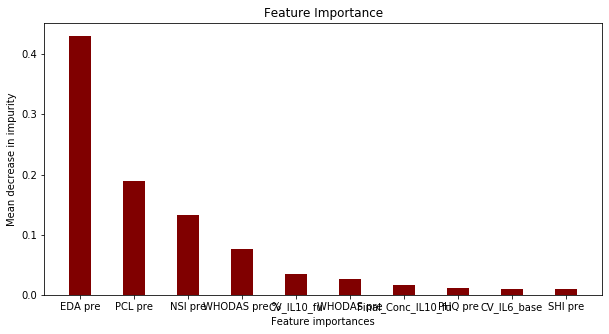

In [146]:
# x axis values
x = [28, 25, 26, 32, 46, 31, 45, 27, 40, 9]
x = ["EDA pre", "PCL pre", "NSI pre", "WHODAS pre %", "CV_IL10_fu", "WHODAS pre", "Final_Conc_IL10_fu", "PHQ pre", "CV_IL6_base", "SHI pre"]
# corresponding y axis values
y = [0.01, 0.01, 0.011875, 0.016923076923076923, 0.026666666666666665, 0.035082644628099166, 0.07646959101504557, 0.13299999999999998, 0.1891193181818182, 0.43020897841018174]
y.reverse()
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)
 
plt.xlabel("Feature importances")
plt.ylabel("Mean decrease in impurity")
plt.title("Feature Importance")
plt.show()  



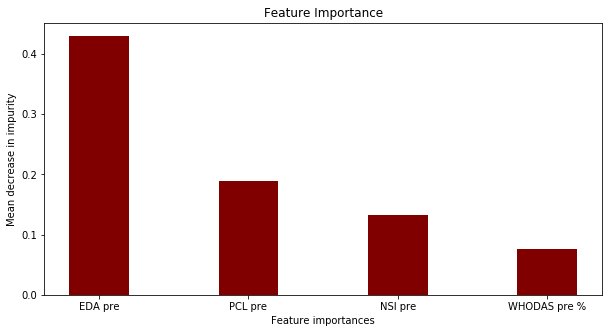

In [147]:
# x axis values
x = [28, 25, 26, 32, 46, 31, 45, 27, 40, 9]
x = ["EDA pre", "PCL pre", "NSI pre", "WHODAS pre %"]
# corresponding y axis values
y = [0.07646959101504557, 0.13299999999999998, 0.1891193181818182, 0.43020897841018174]
y.reverse()
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)
 
plt.xlabel("Feature importances")
plt.ylabel("Mean decrease in impurity")
plt.title("Feature Importance")
plt.show()  